In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("penguins.csv")
df

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


#Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
  if df[col].dtype == "object":
    le = LabelEncoder()
    le.fit(df[col])
    df[col] = le.transform(df[col])
#printing our modified dataset now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    int64  
 2   island             344 non-null    int64  
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                344 non-null    int64  
 8   year               344 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 24.3 KB


Missing values present. Drop them otherwise DecisionTree classifier complains.

In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              342 non-null    int64  
 1   species            342 non-null    int64  
 2   island             342 non-null    int64  
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                342 non-null    int64  
 8   year               342 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 26.7 KB


In [ ]:
X = df.drop("species", axis=1)
y = df["species"]

#Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Decision Tree Classifier

In [ ]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test , y_pred)
recall = recall_score(y_test, y_pred , average=None)
precision = precision_score(y_test, y_pred , average = None)
#recall2 = recall_score(y_test, y_pred , average='macro')
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
#print(f"Recall: {recall2}")
print(f"Precision: {precision}")

Accuracy: 1.0
Recall: [1. 1. 1.]
Precision: [1. 1. 1.]


#Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)

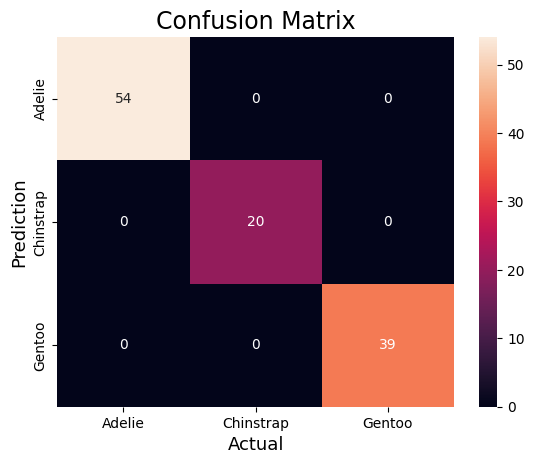

In [ ]:
sns.heatmap(cm, annot=True, xticklabels=["Adelie", "Chinstrap", "Gentoo"], yticklabels=["Adelie", "Chinstrap", "Gentoo"])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()